<a href="https://colab.research.google.com/github/tanishq252/AI-ML-DS-Learning-Series/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Artificial Neural Networks**

#Importing dataset and libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [48]:
dataSet = pd.read_csv("Churn_Modelling.csv")
x = dataSet.iloc[:,3:-1].values
y = dataSet.iloc[:,-1].values

In [49]:
x, y

(array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
        [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
        [502, 'France', 'Female', ..., 1, 0, 113931.57],
        ...,
        [709, 'France', 'Female', ..., 0, 1, 42085.58],
        [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
        [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object),
 array([1, 0, 1, ..., 1, 1, 0]))

#Performing label encoding on gender column and one hot encoding on geography column

In [50]:
# performing label encoding on gender column since it is a column consisting of binary values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])

In [51]:
x[1]

array([608, 'Spain', 0, 41, 1, 83807.86, 1, 0, 1, 112542.58], dtype=object)

In [52]:
# as the geography column consists multi classes values we have to perform one hot encoding on it
# so that it can be used as an appropriate variable for making a good model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [53]:
x[1]

array([0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
      dtype=object)

#Splitting the data into training and testing sets

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8)

#Feature Scaling

In [56]:
#  as the data has multi variables each having different range of values we have 
#  to standardize the data so that all variables will be having equal impact and we will have a good model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

In [57]:
x_train, x_test

(array([[-0.99825153,  1.72058015, -0.57484841, ..., -1.54405141,
          0.96076892, -1.72152915],
        [ 1.00175153, -0.58119931, -0.57484841, ...,  0.64764683,
         -1.040833  , -1.09044647],
        [ 1.00175153, -0.58119931, -0.57484841, ...,  0.64764683,
          0.96076892, -1.39182442],
        ...,
        [ 1.00175153, -0.58119931, -0.57484841, ..., -1.54405141,
         -1.040833  ,  1.14136023],
        [ 1.00175153, -0.58119931, -0.57484841, ...,  0.64764683,
         -1.040833  , -1.715338  ],
        [-0.99825153, -0.58119931,  1.73958906, ..., -1.54405141,
         -1.040833  ,  1.30002666]]),
 array([[-0.99825153, -0.58119931,  1.73958906, ...,  0.64764683,
         -1.040833  ,  0.32791062],
        [-0.99825153,  1.72058015, -0.57484841, ...,  0.64764683,
          0.96076892, -0.28361489],
        [ 1.00175153, -0.58119931, -0.57484841, ...,  0.64764683,
          0.96076892, -0.08205345],
        ...,
        [ 1.00175153, -0.58119931, -0.57484841, ...,  

#Building the ANN model


In [88]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

# initialize model
ann_model = Sequential()
# block 1
ann_model.add(Dense(256,activation = "relu"))
ann_model.add(Dense(256,activation = "relu"))
ann_model.add(Dense(256,activation = "relu"))

# block 2
ann_model.add(Dense(128,activation = "relu"))
ann_model.add(Dense(128,activation = "relu"))
ann_model.add(Dense(128,activation = "relu"))

# block3
ann_model.add(Dense(64,activation = "relu"))
ann_model.add(Dense(64,activation = "relu"))
ann_model.add(Dense(64,activation = "relu"))

# block 4
ann_model.add(Dense(32,activation = "relu"))
ann_model.add(Dense(32,activation = "relu"))
ann_model.add(Dense(32,activation = "relu"))

# output layer
ann_model.add(Dense(1,activation = "sigmoid"))

In [89]:
from keras.callbacks import ReduceLROnPlateau

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')


In [90]:
ann_model.compile(loss="binary_crossentropy",optimizer="adam",metrics= ["accuracy"])
epochs =50
history_ann = ann_model.fit(x_train,y_train,batch_size=32,epochs=epochs,validation_data=(x_test,y_test), callbacks=[lr_reduce])

Epoch 1/50
250/250 [==============================] - 3s 8ms/step - loss: 0.4130 - accuracy: 0.8190 - val_loss: 0.4349 - val_accuracy: 0.8310 - lr: 0.0010
Epoch 2/50
250/250 [==============================] - 1s 6ms/step - loss: 0.3556 - accuracy: 0.8550 - val_loss: 0.3935 - val_accuracy: 0.8450 - lr: 0.0010
Epoch 3/50
243/250 [============================>.] - ETA: 0s - loss: 0.3402 - accuracy: 0.8593
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
250/250 [==============================] - 2s 7ms/step - loss: 0.3404 - accuracy: 0.8595 - val_loss: 0.3715 - val_accuracy: 0.8490 - lr: 0.0010
Epoch 4/50
250/250 [==============================] - 2s 7ms/step - loss: 0.3185 - accuracy: 0.8669 - val_loss: 0.3659 - val_accuracy: 0.8515 - lr: 3.0000e-04
Epoch 5/50
249/250 [============================>.] - ETA: 0s - loss: 0.3145 - accuracy: 0.8678
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
250/250 [==============================] - 

In [91]:
y_pred = ann_model.predict(x_test)

In [93]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [113]:
l = []
for i in y_pred:
  if i >= 0.5:
    l.append(1)
  else:
    l.append(0)
l = np.array(l)


In [114]:
print(np.concatenate((l.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:100])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


#Predicting the solution based on input

In [110]:
# input the data in the way it was represented after one hot encoding
# we have to transform the data by performing feature scaling
print(ann_model.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))>0.5)

[[False]]


In [107]:
# so the customer is not going to leave or exit the bank as per the predictions

#Confusion matrix and visualisation

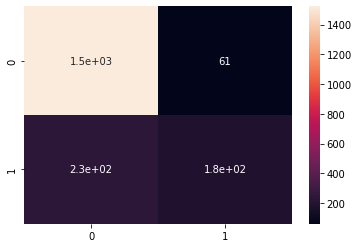

In [119]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, l)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [116]:
print(cm)

[[1523   61]
 [ 234  182]]


In [122]:
accuracy_score(y_test, y_pred>0.5) 

0.8525